In [44]:
# import library
import numpy as np  
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# data splitting
from sklearn.model_selection import train_test_split 

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder

# missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# binning
from sklearn.preprocessing import KBinsDiscretizer

# polynomial features
from sklearn.preprocessing import PolynomialFeatures

# column transfornmer
from sklearn.compose import ColumnTransformer

# pipeline
from sklearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_val_score

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# imbalanced 
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE

# modeling
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, make_scorer, fbeta_score

from sklearn.metrics import confusion_matrix

## **Exercise: Metrics & Hyperparameter Tuning**

**Gunakan dataset 'https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud'**

Carilah model dan hyperparameter terbaik
1. Lakukan EDA singkat untuk mengeksplorasi dataset terlebih dahulu.
2. Lakukan preprocessing pada features jika dibutuhkan.
3. Lakukan modeling Logistic Regression, Decision Tree, dan KNeighbors.
4. Pilih 1 model terbaik berdasarkan hasil cross validasi 3 model di atas.
5. Lakukan hyperparameter tuning pada model terpilih tsb.
6. Lakukan prediksi pada test set dari model terpilih (sebelum hyperparameter tuning).
7. Lakukan prediksi pada test set dari model dengan hyperparameter tuning.
8. Bandingkan hasil performa model sebelum dan sesudah tuning.

*Tips: Gunakan Pipeline*

**Features Description**

FN lebih costly dibanding FP jadinya perlu nurunin FNnya, pakenya recall

## Preprocessing

In [45]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [47]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [48]:
df.duplicated().sum()

np.int64(1081)

In [49]:
df.drop_duplicates(inplace=True)

In [50]:
df.duplicated().sum()

np.int64(0)

In [51]:
df['Class'].unique()

array([0, 1])

## EDA

In [52]:
matrix_triux = np.triu(df.corr(numeric_only=True))

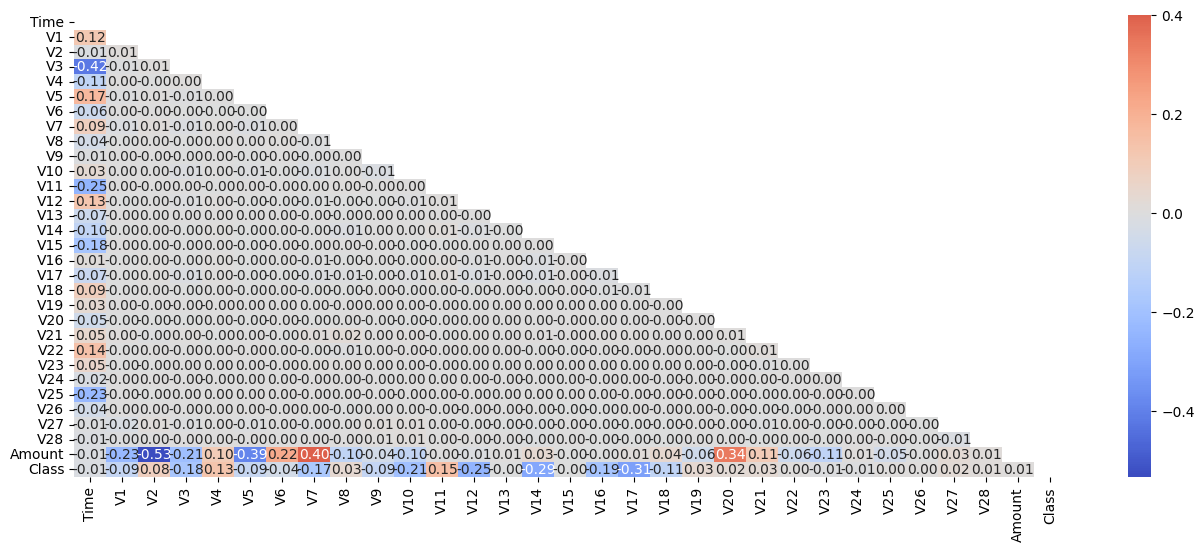

In [53]:
plt.figure(figsize=(16,6))
sns.heatmap(data = df.corr(numeric_only=True),
            annot=True,
            cmap='coolwarm',
            center = 0, mask = matrix_triux,
            fmt=".2f")

plt.show()

In [54]:
df2 = df.drop(columns=['Time', 'V8', 'V9', 'V13', 'V15', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])

In [55]:
matrix_triux2 = np.triu(df2.corr(numeric_only=True))

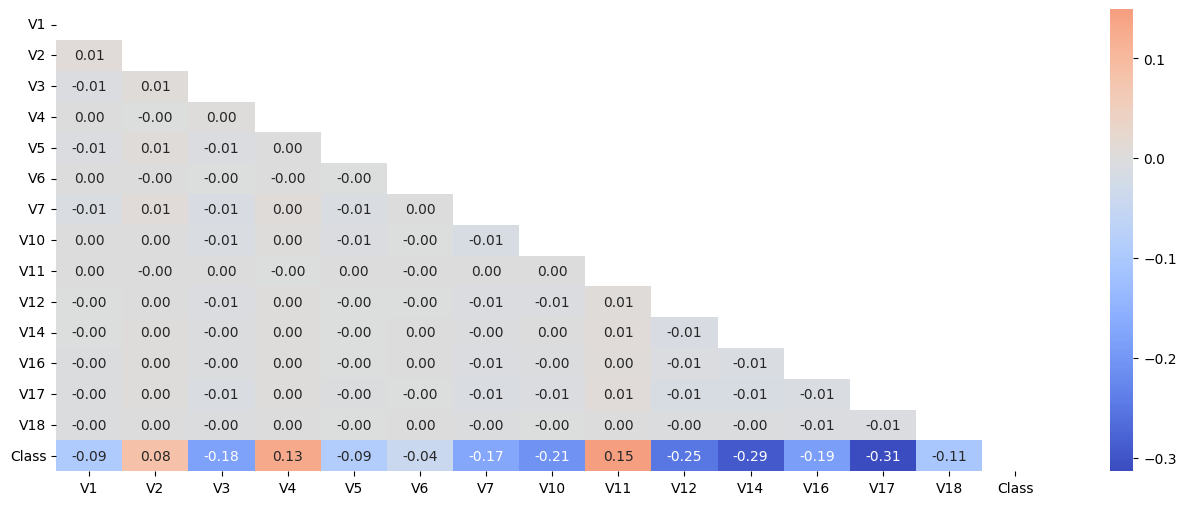

In [56]:
plt.figure(figsize=(16,6))
sns.heatmap(data = df2.corr(numeric_only=True),
            annot=True,
            cmap='coolwarm',
            center = 0, mask = matrix_triux2,
            fmt=".2f")

plt.show()

## Define X and Y

In [57]:
df2

,V1,V2,V3,V4,V5,V6,V7,V10,V11,V12,V14,V16,V17,V18,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,4.356170,-1.593105,2.711941,4.626942,1.107641,1.991691,0.510632,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,-0.975926,-0.150189,0.915802,-0.675143,-0.711757,-0.025693,-1.221179,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,-0.484782,0.411614,0.063119,-0.510602,0.140716,0.313502,0.395652,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,-0.399126,-1.933849,-0.962886,0.449624,-0.608577,0.509928,1.113981,0


In [58]:
X = df2.drop(columns='Class')
y = df2['Class']
X, y

(               V1         V2        V3        V4        V5        V6  \
 0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
 1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
 2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
 3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
 4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
 ...           ...        ...       ...       ...       ...       ...   
 284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
 284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
 284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
 284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
 284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   
 
               V7       V10       V11       V12       V14       V16       V17  \
 0       0.239599  0.090794 -0.551600 -0.

## Data Splitting

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,
                 y,
                 random_state=0,
                 test_size=0.2,
                 stratify=y)

In [60]:
X

,V1,V2,V3,V4,V5,V6,V7,V10,V11,V12,V14,V16,V17,V18
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,4.356170,-1.593105,2.711941,4.626942,1.107641,1.991691,0.510632
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,-0.975926,-0.150189,0.915802,-0.675143,-0.711757,-0.025693,-1.221179
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,-0.484782,0.411614,0.063119,-0.510602,0.140716,0.313502,0.395652
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,-0.399126,-1.933849,-0.962886,0.449624,-0.608577,0.509928,1.113981


## Preprocessing

1. RobustScaler: semuanya

In [61]:
df2['Class'].value_counts() / len(df2['Class'])

Class
0    0.998333
1    0.001667
Name: count, dtype: float64

perlu resampling

In [62]:
transformer = ColumnTransformer(
    [('robust', RobustScaler(), ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18'])],
     remainder='passthrough'
)

## Cross Validation

- Mencari algoritma terbaik

- Pilih model terbaik dengan cross-validation (n_splits=5):
    * Logistic regression: solver = liblinear
    * KNN: n_neighbors = 3
    * Decision tree: max depth = 3

In [63]:
#f2_score = make_scorer(fbeta_score, beta=2)

In [64]:
logreg = LogisticRegression(random_state=0, solver= 'liblinear')
knn = KNeighborsClassifier(n_neighbors=3)
tree = DecisionTreeClassifier(random_state=0, max_depth=3) 

In [65]:
from sklearn.metrics import get_scorer_names
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'd2_absolute_error_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_max_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 're

In [66]:
list_model = [logreg, knn, tree]
list_all_score = []
list_mean_score = []
list_std = []

for model in list_model:
    # pipeline
    pipe_prep_model =  Pipeline([
        ('preprocessing', transformer),
        ('modeling', model)
    ])

    # cross val
    crossval = cross_val_score(estimator=pipe_prep_model,
                    X = X_train,
                    y = y_train,
                    cv = 5,
                    scoring = 'recall') 
    
    # recall
    list_all_score.append(crossval.round(2))
    list_mean_score.append(crossval.mean())
    list_std.append(crossval.std())

In [67]:
df_benchmark = pd.DataFrame()
df_benchmark['algo'] = list_model
df_benchmark['all_score'] = list_all_score
df_benchmark['mean_score'] = list_mean_score
df_benchmark['std_score'] = list_std

df_benchmark

,algo,all_score,mean_score,std_score
0,"LogisticRegression(random_state=0, solver='lib...","[0.65, 0.52, 0.59, 0.58, 0.53]",0.574140,0.048653
1,KNeighborsClassifier(n_neighbors=3),"[0.83, 0.75, 0.8, 0.79, 0.74]",0.780456,0.033919
2,"DecisionTreeClassifier(max_depth=3, random_sta...","[0.68, 0.65, 0.75, 0.75, 0.71]",0.708772,0.038220


KNClassifier bagus di mean_score, decisionTreeClassifier bagus di standarddeviasi

In [68]:
pipe_prep_model

,steps,"[('preprocessing', ...), ('modeling', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('robust', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## Resampling

In [69]:
smote = SMOTE()
nm = NearMiss()
ros = RandomOverSampler()
rus = RandomUnderSampler()

In [70]:
from imblearn.pipeline import Pipeline

In [71]:
list_model = [logreg, knn, tree]
list_all_score = []
list_mean_score = []
list_std = []

for model in list_model:
    # pipeline
    pipe_prep_model =  Pipeline([
        ('preprocessing', transformer),
        ('resampling', smote),
        ('modeling', model)
    ])

    # cross val
    crossval = cross_val_score(estimator=pipe_prep_model,
                    X = X_train,
                    y = y_train,
                    cv = 5,
                    scoring = 'recall')
    
    # recall
    list_all_score.append(crossval.round(2))
    list_mean_score.append(crossval.mean())
    list_std.append(crossval.std())

In [72]:
df_resampling = pd.DataFrame()
df_resampling['algo'] = list_model
df_resampling['all_score'] = list_all_score
df_resampling['mean_score'] = list_mean_score
df_resampling['std_score'] = list_std

df_resampling

,algo,all_score,mean_score,std_score
0,"LogisticRegression(random_state=0, solver='lib...","[0.91, 0.88, 0.91, 0.89, 0.88]",0.894175,0.011867
1,KNeighborsClassifier(n_neighbors=3),"[0.85, 0.81, 0.84, 0.86, 0.79]",0.830702,0.025483
2,"DecisionTreeClassifier(max_depth=3, random_sta...","[0.88, 0.92, 0.92, 0.91, 0.86]",0.896842,0.025523


disini decisiontree paling bagus

In [73]:
display(df_benchmark, df_resampling)

,algo,all_score,mean_score,std_score
0,"LogisticRegression(random_state=0, solver='lib...","[0.65, 0.52, 0.59, 0.58, 0.53]",0.574140,0.048653
1,KNeighborsClassifier(n_neighbors=3),"[0.83, 0.75, 0.8, 0.79, 0.74]",0.780456,0.033919
2,"DecisionTreeClassifier(max_depth=3, random_sta...","[0.68, 0.65, 0.75, 0.75, 0.71]",0.708772,0.038220


,algo,all_score,mean_score,std_score
0,"LogisticRegression(random_state=0, solver='lib...","[0.91, 0.88, 0.91, 0.89, 0.88]",0.894175,0.011867
1,KNeighborsClassifier(n_neighbors=3),"[0.85, 0.81, 0.84, 0.86, 0.79]",0.830702,0.025483
2,"DecisionTreeClassifier(max_depth=3, random_sta...","[0.88, 0.92, 0.92, 0.91, 0.86]",0.896842,0.025523


## Hyperparamter Tuning

In [74]:
f2_score = make_scorer(fbeta_score, beta=2)

In [75]:
pipe_prep_model =  Pipeline([
        ('preprocessing', transformer),
        #('resampling', smote),
        ('modeling', tree)
    ])

# hyperparam
hyperparam = {  'modeling__max_depth': range(2, 30),    
                'modeling__min_samples_split': range(10,71,10),
                'modeling__min_samples_leaf': range(10,71,10),
                'modeling__criterion': ['gini', 'entropy'],
# KNC                # 'modeling__n_neighbors': list(range(1, 31)),
                # 'modeling__weights': ['uniform', 'distance'],
                # 'modeling__metric': ['minkowski', 'manhattan', 'euclidean'],
                # 'modeling__p': [1, 2],  # only matters if minkowski
# Logreg                #'modeling__C': [0.001, 0.01, 0.1, 1, 10, 100], #regularization strength: 0.001-0.1 small: coef small reduce overfitting, 10-100 large: big coef reduce underfitting but risk overfitting, 1 balanced.
                #'modeling__penalty': ['l1','l2'], #type of regularization, l1 for lasso: drops irrelevant predictors, l2 for ridge: no dropping but make the predictors smaller.
                #'modeling__class_weight': [None, 'balanced'], #None default: all class treated equally, balanced: adjust weight to minority class (default)
                'preprocessing__robust': [RobustScaler(), MinMaxScaler(), StandardScaler()], ## pake preprocessing ini memang ngeboost nilai recall, tapi kalo di confusion matrix dia jadi leih jelek, perlu scroing tambahan kayak f1 sealin recall
                #'resampling': [None, ros, rus, nm, smote]
              }

gridsearch = GridSearchCV(
    estimator = pipe_prep_model,
    param_grid = hyperparam, 
    n_jobs = -1, #use all cpu
    cv = 5,
    scoring = 'recall',
    #refit= 'recall'
)

rsearch = RandomizedSearchCV(
    estimator=pipe_prep_model,
    param_distributions=hyperparam,
    cv = 5,
    n_jobs=-1,
    scoring='recall',
    n_iter=100,
    #refit= 'recall'
)

In [ ]:
gridsearch.fit(X_train, y_train)

In [ ]:
gridsearch.best_estimator_

In [ ]:
gridsearch.best_score_

In [ ]:
rsearch.fit(X_train,y_train)

In [ ]:
rsearch.best_estimator_

In [ ]:
rsearch.best_score_

In [ ]:
y_test.value_counts()

## Predict

before

In [ ]:
# define model
model = KNeighborsClassifier(n_neighbors=3)

# pipe transformer & modeling
pipe_prep_model = Pipeline([
    ('preprocessing', transformer),
    ('model', KNeighborsClassifier(n_neighbors=3))
])

# fit
pipe_prep_model.fit(X_train, y_train)

# predict
y_pred_before = pipe_prep_model.predict(X_test)
y_pred_before

# recall
recall_score(y_test, y_pred_before)

after

In [ ]:
# define model
model = gridsearch.best_estimator_

# fit
model.fit(X_train, y_train)

# predict
y_pred_after = model.predict(X_test)

# recall
recall_score(y_test, y_pred_after)

In [ ]:
model[-1].coef_

In [ ]:
transformer.get_feature_names_out()

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
# conf. before tuning
cm_before = confusion_matrix(y_test, y_pred_before)
# conf. after tuning
cm_after = confusion_matrix(y_test, y_pred_after)
cm_before, cm_after

In [ ]:
# # before tuning
# plt.figure(figsize=(10,6))
# plt.subplot(1,2,1)
disp_before = ConfusionMatrixDisplay(confusion_matrix=cm_before)
disp_before.plot()
plt.title('Before Tuning')

# after tuning
# plt.subplot(1,2,2)
disp_after = ConfusionMatrixDisplay(confusion_matrix=cm_after)
disp_after.plot()
plt.title('After Tuning')

plt.show()

In [ ]:
print(classification_report(y_test, y_pred_before))

In [ ]:
print(classification_report(y_test, y_pred_after))